## Import Libraries

In [103]:
import joblib as joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
import math
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,QuantileTransformer,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Dataset

In [104]:
# Load transaction data
df = pd.read_csv('Merged-data.csv')




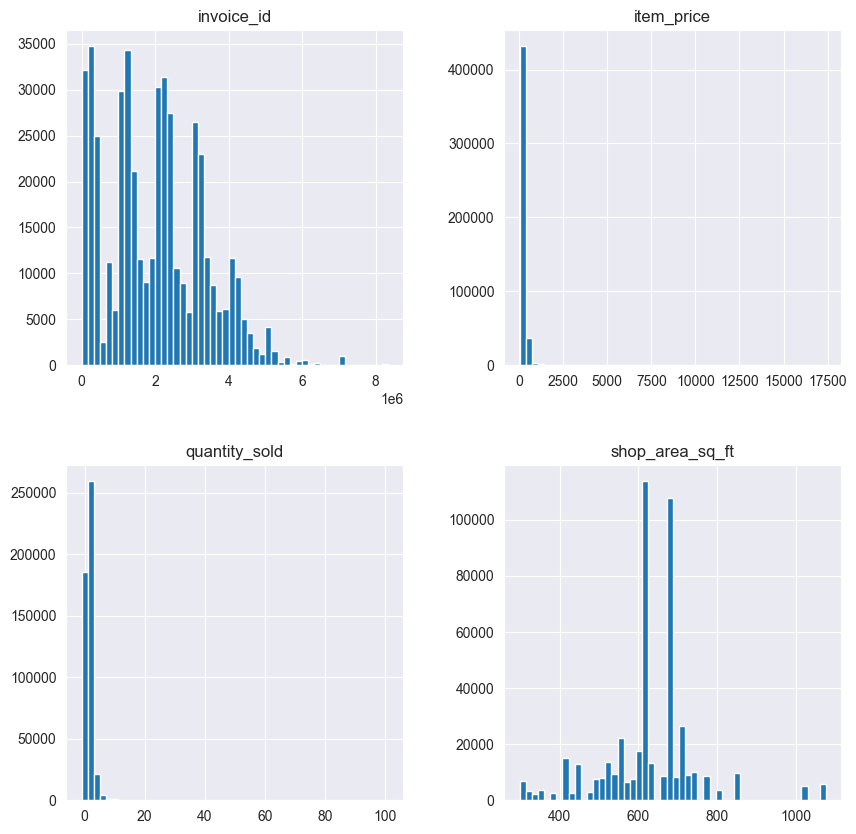

In [105]:
#histograms to visualize the distribution of each feature
df.hist(figsize=(10,10), bins=50)
plt.show()

In [106]:
# assuming df is a pandas DataFrame
z_scores = stats.zscore(df[['item_price','quantity_sold']])

# set a limit for z-score
zScoreLimit = 3

# find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > zScoreLimit)

# calculate the total number of outliers
num_outliers = len(outlier_indices[0])

if num_outliers > 0:
    print("Total number of outliers = ", num_outliers)
else:
    print("No outliers found.")

# df = df.drop(outlier_indices[0])


Total number of outliers =  10320


In [107]:
print(df.describe())

         invoice_id     item_price  quantity_sold  shop_area_sq_ft
count  4.676540e+05  473974.000000  473974.000000    473974.000000
mean   1.996684e+06     206.689734       1.925506       624.964087
std    1.344594e+06     166.764732       1.634535       122.021587
min    1.700000e+01      35.000000      -1.000000       298.000000
25%    1.032114e+06     100.000000       1.000000       576.000000
50%    2.032996e+06     200.000000       2.000000       617.000000
75%    3.032568e+06     220.000000       2.000000       676.000000
max    8.331754e+06   17400.000000     101.000000      1077.000000


In [108]:
df = df.drop(outlier_indices[0])

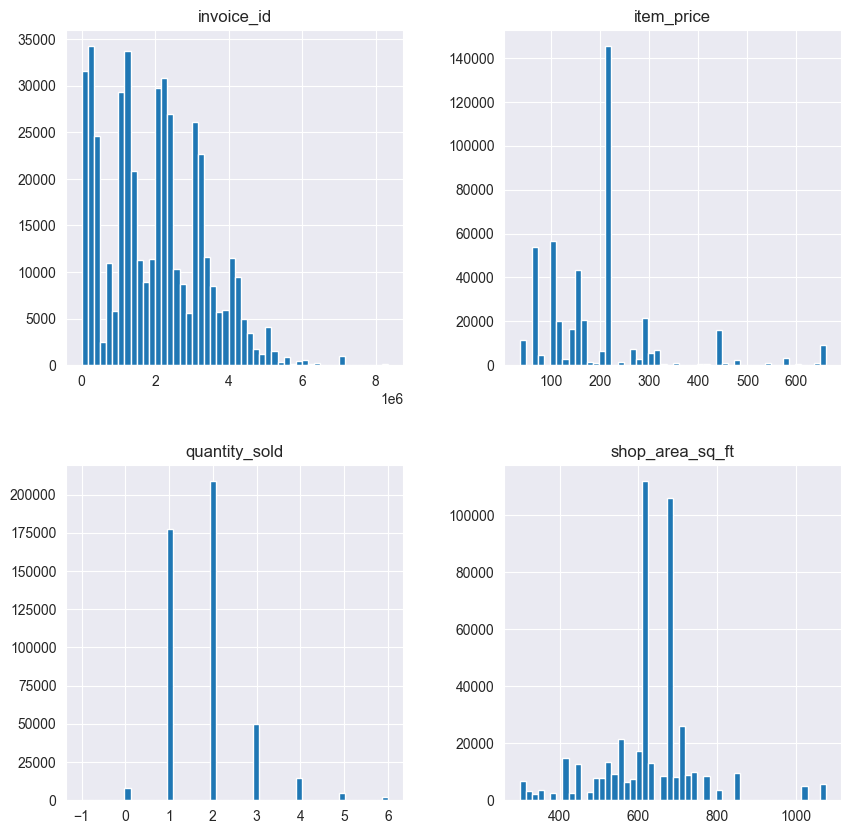

In [109]:
#histograms to visualize the distribution of each feature
df.hist(figsize=(10,10), bins=50)
plt.show()

In [110]:
print(df.describe())

         invoice_id     item_price  quantity_sold  shop_area_sq_ft
count  4.597390e+05  465795.000000  465795.000000    465795.000000
mean   1.996334e+06     194.117648       1.801131       624.974839
std    1.344666e+06     119.511718       0.897816       121.701282
min    1.700000e+01      35.000000      -1.000000       298.000000
25%    1.031784e+06     100.000000       1.000000       576.000000
50%    2.032700e+06     200.000000       2.000000       617.000000
75%    3.032678e+06     220.000000       2.000000       676.000000
max    8.331754e+06     660.000000       6.000000      1077.000000


In [111]:
# Counting the number of duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
df.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert df.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  31118
No more duplicate records


1. Checking Missing Values

In [112]:
# Check if there is missing values
missing = df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
item_description    33739
transaction_date        0
invoice_id           5512
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        79712
dtype: int64


In [113]:
# Create an empty dataframe to store the dropped records where 'invoice_id' or 'item_description' is null
dropped_records = pd.DataFrame()

# Select the rows where 'invoice_id' and 'item_description' are not null
df = df.dropna(subset=['invoice_id', 'item_description'])

# Select the rows where 'invoice_id' or 'item_description' is null and add them to the dropped_records dataframe
null_records = df[df[['invoice_id', 'item_description']].isnull().any(axis=1)]
dropped_records = pd.concat([dropped_records, null_records])

# Save the dropped records to a CSV file


In [114]:
# Check if there is missing values
missing = df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
item_description        0
transaction_date        0
invoice_id              0
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        73012
dtype: int64


In [115]:
le = LabelEncoder()
joblib.dump(le, 'label_encoder.pkl')
# df['shop_id'] = le.fit_transform(df['shop_id'])
# new_df = pd.get_dummies(df, columns=['day_of_week'])

['label_encoder.pkl']

In [116]:
print(df.head())

     item_description          transaction_date  invoice_id customer_id  \
0  ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1     TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
2       CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
3    GINGER BEER 1.5L  2021-12-10T00:00:00.000Z   1000053.0        VT9C   
4    GINGER BEER 1.5L  2021-12-10T00:00:00.000Z   1000057.0        8QLS   

   shop_id  item_price  quantity_sold  shop_area_sq_ft shop_profile  
0  SHOP008         220              2              678     Moderate  
1  SHOP008         160              2              678     Moderate  
2  SHOP008         150              2              678     Moderate  
3  SHOP008         220              1              678     Moderate  
4  SHOP008         440              1              678     Moderate  


In [117]:
mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Shop_profile'] = df['shop_profile'].replace(mapping)


In [118]:
df.head()
final_df = df.drop(['shop_profile'], axis=1)

In [119]:
final_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,Shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,2.0
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,2.0
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,2.0
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220,1,678,2.0
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440,1,678,2.0


In [120]:
# final_df['year'] = pd.to_datetime(final_df['transaction_date']).dt.year
# final_df['month'] = pd.to_datetime(final_df['transaction_date']).dt.month
# final_df['day'] = pd.to_datetime(final_df['transaction_date']).dt.day
final_df['day_of_week'] = pd.to_datetime(final_df['transaction_date']).dt.day_name()
# create a new DataFrame with selected columns
new_df = final_df[['transaction_date','day_of_week',"shop_id", "item_price", "quantity_sold", "shop_area_sq_ft", "Shop_profile"]]
new_df['shop_id'] = le.fit_transform(new_df['shop_id'])
new_df['total_amount'] = new_df['item_price'] * new_df['quantity_sold']
new_df.head()
new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
# Drop rows where amount is 0
new_df = new_df[new_df['total_amount'] != 0]
new_df.to_csv("basic.csv", index=False)


C:\Users\kasun\AppData\Local\Temp\ipykernel_11544\3022979910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['shop_id'] = le.fit_transform(new_df['shop_id'])
C:\Users\kasun\AppData\Local\Temp\ipykernel_11544\3022979910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_amount'] = new_df['item_price'] * new_df['quantity_sold']
C:\Users\kasun\AppData\Local\Temp\ipykernel_11544\3022979910.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [121]:
df = pd.read_csv("basic.csv")
df["Shop_profile"] = df["Shop_profile"].fillna("nan")
# Convert the transaction_date column to datetime format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Group the data by shop_id and transaction date, and calculate the total_amount, quantity_sold and revenue per day
grouped = df.groupby(["shop_id", pd.Grouper(key="transaction_date", freq="D"), "day_of_week", "shop_area_sq_ft", "Shop_profile"]).agg({"total_amount": "sum", "quantity_sold": "sum"})

# Reset the index to make the grouped columns as regular columns
grouped = grouped.reset_index()

# Rename the columns
grouped = grouped.rename(columns={"transaction_date": "date", "total_amount": "revenue"})

# Save the new dataset as a CSV file
grouped.to_csv("daily_sales_per_shop.csv", index=False, date_format="%Y-%m-%d")
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7622 entries, 0 to 7621
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   shop_id          7622 non-null   int64              
 1   date             7622 non-null   datetime64[ns, UTC]
 2   day_of_week      7622 non-null   int64              
 3   shop_area_sq_ft  7622 non-null   int64              
 4   Shop_profile     7622 non-null   object             
 5   revenue          7622 non-null   int64              
 6   quantity_sold    7622 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 417.0+ KB


In [122]:
# Load data
data = pd.read_csv('daily_sales_per_shop.csv')

# Make a copy of the original data
original_data = data.copy()

# Create date-related features
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['year'] = data['date'].dt.year

# Create lag features
data['revenue_lag1'] = data['revenue'].shift(1)
data['quantity_sold_lag1'] = data['quantity_sold'].shift(1)

# Create rolling window statistics
data['revenue_7d_mean'] = data['revenue'].rolling(window=7).mean()
data['quantity_sold_7d_mean'] = data['quantity_sold'].rolling(window=7).mean()
data['revenue_14d_mean'] = data['revenue'].rolling(window=14).mean()
data['quantity_sold_14d_mean'] = data['quantity_sold'].rolling(window=14).mean()
data['revenue_30d_mean'] = data['revenue'].rolling(window=30).mean()
data['quantity_sold_30d_mean'] = data['quantity_sold'].rolling(window=30).mean()



# Create interaction features
data['area_sold_interaction'] = data['shop_area_sq_ft'] * data['quantity_sold']

# Identify and drop null values
dropped_records = data[data['Shop_profile'].isnull()]
data = data.dropna(subset=['Shop_profile'])

# Save the dropped records and cleaned data to CSV files
dropped_records.to_csv("dropped_records.csv", index=False)
data.to_csv("cleaned_data.csv", index=False)



In [123]:
# Load transaction data
df = pd.read_csv('cleaned_data.csv')

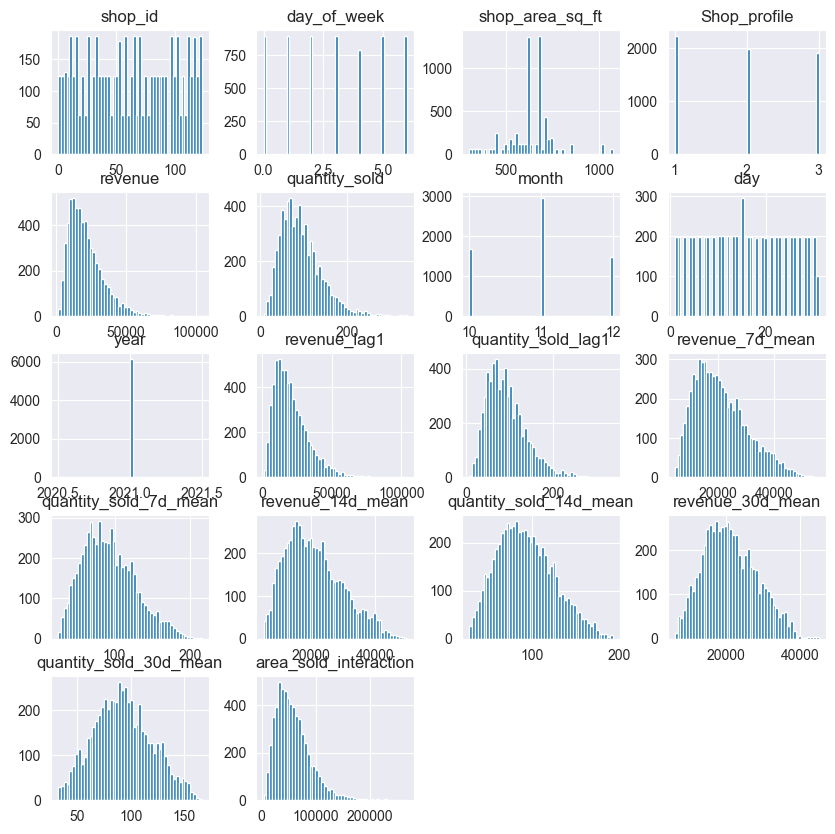

In [124]:
#histograms to visualize the distribution of each feature
df.hist(figsize=(10, 10), bins=50)
plt.show()

In [125]:
print(df.describe())

           shop_id  day_of_week  shop_area_sq_ft  Shop_profile        revenue  \
count  6134.000000  6134.000000      6134.000000   6134.000000    6134.000000   
mean     62.081839     2.983534       627.761330      1.949788   21040.404304   
std      36.692310     2.012003       128.909355      0.821262   12381.135792   
min       0.000000     0.000000       298.000000      1.000000    1180.000000   
25%      31.000000     1.000000       565.000000      1.000000   11861.250000   
50%      62.000000     3.000000       617.000000      2.000000   18395.000000   
75%      96.000000     5.000000       676.000000      3.000000   27393.750000   
max     123.000000     6.000000      1077.000000      3.000000  104255.000000   

       quantity_sold        month          day    year   revenue_lag1  \
count    6134.000000  6134.000000  6134.000000  6134.0    6133.000000   
mean       92.662374    10.970166    15.735246  2021.0   21028.902658   
std        46.085356     0.717754     8.739654     

Correlation between features:
                         shop_id  day_of_week  shop_area_sq_ft  Shop_profile  \
shop_id                 1.000000    -0.000066         0.041962      0.066810   
day_of_week            -0.000066     1.000000         0.000321      0.000388   
shop_area_sq_ft         0.041962     0.000321         1.000000      0.287539   
Shop_profile            0.066810     0.000388         0.287539      1.000000   
revenue                 0.006418    -0.128567         0.041796      0.152771   
quantity_sold          -0.010618    -0.136083         0.077725      0.221805   
month                  -0.001864     0.077792         0.001535     -0.000052   
day                     0.000448    -0.042633        -0.000244      0.000101   
year                         NaN          NaN              NaN           NaN   
revenue_lag1            0.006182    -0.143220         0.039841      0.150339   
quantity_sold_lag1     -0.010922    -0.163118         0.075068      0.218002   
revenue_7d

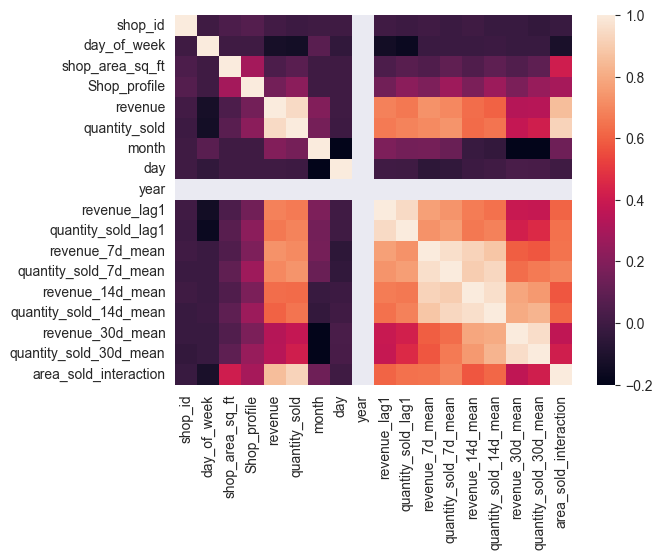

In [126]:
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation between features:")
print(correlation_matrix)

#heatmap to visualize the correlation matrix between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmin=-0.2, vmax=1)
plt.show()

C:\Users\kasun\AppData\Local\Temp\ipykernel_11544\4040466757.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


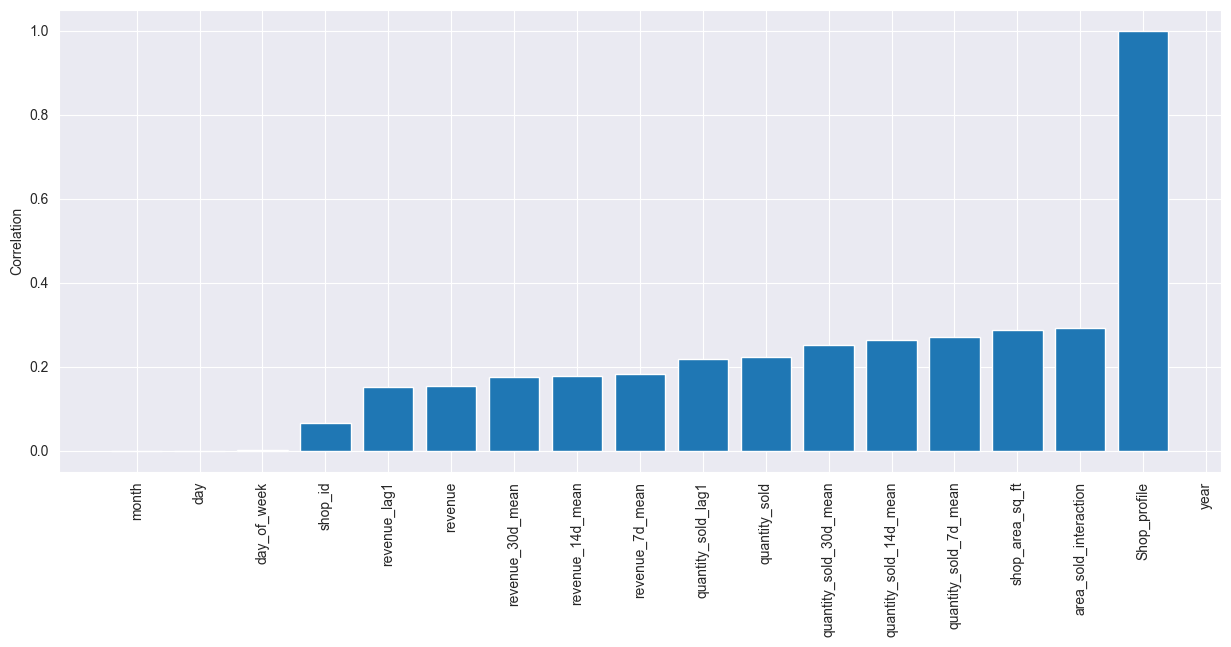

In [127]:
correlations = df.corr()['Shop_profile'].sort_values()

#bar chart of the correlations
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(correlations.index, correlations)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_ylabel('Correlation')
plt.show()

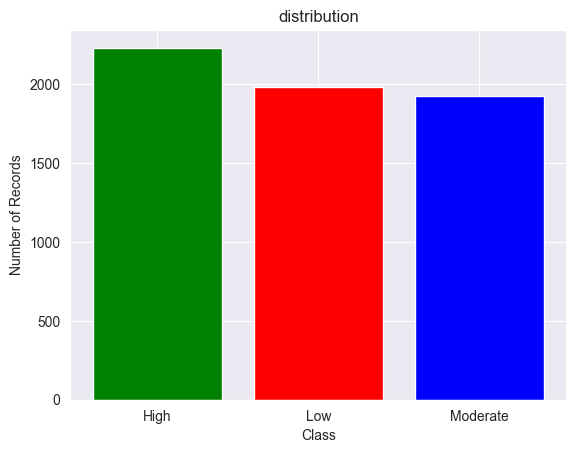

In [128]:
distribution = df['Shop_profile'].value_counts()

# Plotting class distribution
plt.bar(distribution.index, distribution.values,color=['green', 'red','blue'])
plt.xticks(distribution.index, ['High', 'Low' ,'Moderate'])
plt.xlabel('Class')
plt.ylabel('Number of Records')
plt.title('distribution')
plt.show()

In [129]:
counts = df['Shop_profile'].value_counts()
print(counts)


1.0    2230
2.0    1982
3.0    1922
Name: Shop_profile, dtype: int64


In [151]:
# # import pandas as pd
# #
# # Load the original dataset
# df1 = pd.read_csv("cleaned_data.csv")
# df1.dropna(inplace=True)
# # Generate a list of 25 random shop IDs
# random_shops = df1["shop_id"].sample(n=24 )
#
# # Create a boolean mask for the rows that match the randomly selected shop IDs
# mask = df1["shop_id"].isin(random_shops)
#
# # Create a new dataset with rows that match the mask
# random_df = df1.loc[mask]
#
# # Save the new dataset to a new CSV file
# random_df.to_csv("test_half.csv", index=False)
#
# # Create another boolean mask for the rows that do not match the randomly selected shop IDs
# mask = ~df1["shop_id"].isin(random_shops)
#
# # Create a new dataset with rows that match the mask
# remaining_df = df1.loc[mask]
#
# # Save the new dataset to a new CSV file
# remaining_df.to_csv("train_half.csv", index=False)

In [152]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Load dataset
data = pd.read_csv('cleaned_data.csv')
data = data.drop('date', axis=1)
data = data.drop('shop_area_sq_ft', axis=1)
data = data.drop('area_sold_interaction', axis=1)
data.dropna(inplace=True)
# Drop 'shop_id' column
data.drop('shop_id', axis=1, inplace=True)

# Scale the features
scaler = QuantileTransformer()
X_scaled = scaler.fit_transform(data.drop('Shop_profile', axis=1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Shop_profile'], test_size=0.1, random_state=4)

# Apply SMOTE to balance the training set
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Set up the parameter grid for Gradient Boosting
gb_param_grid = {'n_estimators': [50, 100, 200,300],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'max_depth': [3, 5, 7,10]}

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Set up the GridSearchCV with 5-fold cross-validation
gb_cv = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1)

# Fit the model with the balanced training set
gb_cv.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
gb_best_params = gb_cv.best_params_
print('Gradient Boosting best hyperparameters:', gb_best_params)

# Predict on the testing set with the best model
gb_best_model = gb_cv.best_estimator_
gb_preds = gb_best_model.predict(X_test)

# Evaluate the model
gb_acc = accuracy_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds, average='weighted')
gb_cm = confusion_matrix(y_test, gb_preds)
print('Gradient Boosting accuracy:', gb_acc)
print('Gradient Boosting F1 score:', gb_f1)
print('Gradient Boosting confusion matrix:')
print(gb_cm)

# Save the Gradient Boosting model
joblib.dump(gb_best_model, 'gb_model.pkl')

# Save the trained scaler
joblib.dump(scaler, 'scaler.pkl')


Gradient Boosting best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Gradient Boosting accuracy: 0.7191489361702128
Gradient Boosting F1 score: 0.7199513520311044
Gradient Boosting confusion matrix:
[[51 17  6]
 [19 64  8]
 [ 9  7 54]]


['scaler.pkl']

In [158]:
# Load the saved QuantileTransformer object
scaler = joblib.load('scaler.pkl')


# Load the saved Gradient Boosting model
gb_model = joblib.load('gb_model.pkl')

# Load the test data
test_data1 = pd.read_csv('dropped_records.csv')
test_data2 = pd.read_csv('dropped_records.csv')
encodedata = pd.read_csv('Merged-data.csv')
# Preprocess the test data
test_data1 = test_data1.drop(['date','shop_area_sq_ft','area_sold_interaction'], axis=1)


# Extract the 'shop_id' column from the test data
shop_ids = test_data1['shop_id']

# Transform the test data using the scaler object
test_data_scaled = scaler.transform(test_data1.drop(['shop_id', 'Shop_profile'], axis=1))



# Make predictions with the Gradient Boosting model
gb_preds = gb_model.predict(test_data_scaled)


# Create a DataFrame with the shop_id and predicted classes
pred_df = pd.DataFrame({'shop_id': shop_ids, 'gb_pred': gb_preds})

# Group the DataFrame by shop_id and class and count the predictions
grouped_preds = pred_df.groupby(['shop_id', 'gb_pred']).size().unstack(fill_value=0)

# Get the most common class for each shop_id
most_common_preds = grouped_preds.idxmax(axis=1)

# Add the optimal decision column
grouped_preds['optimal_decision'] = most_common_preds
# Define the mapping between the class ids and their corresponding labels
class_mapping = {1: 'Low', 2: 'Moderate', 3: 'High'}

# Load the saved label encoder object
encoder = joblib.load('label_encoder.pkl')
# Decode the encoded shop ids
# decoded_shop_ids = encoder.inverse_transform(grouped_preds['shop_id'])
# Fit the encoder on the shop ids
encoder.fit(encodedata['shop_id'])
decoded_shop_ids = encoder.inverse_transform(grouped_preds.index.values)

grouped_preds['Shop_id'] = decoded_shop_ids


# Decode the predicted class ids and the shop profiles
grouped_preds['predicted_class'] = grouped_preds['optimal_decision'].map(class_mapping)
grouped_preds = grouped_preds.rename_axis('shop_id')
print(grouped_preds)
grouped_preds[['Shop_id', 'predicted_class']].to_csv('Testing-data.csv', index=False)



gb_pred  1.0  2.0  3.0  optimal_decision  Shop_id predicted_class
shop_id                                                          
1         18   17   27               3.0  SHOP002            High
18        35   13   14               1.0  SHOP019             Low
22        25   19   18               1.0  SHOP023             Low
23        36   19    7               1.0  SHOP024             Low
28        31   15   16               1.0  SHOP029             Low
29        43   12    7               1.0  SHOP030             Low
37        53    7    2               1.0  SHOP038             Low
43        19   43    0               2.0  SHOP044        Moderate
45        32   14   16               1.0  SHOP046             Low
49        34   15   13               1.0  SHOP050             Low
55         6    0   56               3.0  SHOP056            High
60        35    7   20               1.0  SHOP061             Low
68        29   33    0               2.0  SHOP070        Moderate
72        